In [17]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
wine = load_wine()
X = wine.data
y = wine.target

# Rename classes for uniqueness
class_map = {0: "WineA", 1: "WineB", 2: "WineC"}
y_named = [class_map[i] for i in y]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_named, test_size=0.3, random_state=42)


In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [20]:
df = pd.DataFrame(X_test, columns=wine.feature_names)
df['Actual'] = y_test
df['Predicted'] = y_pred

df.to_csv('wine_unique_predictions.csv', index=False)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Actual,Predicted
0,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,WineA,WineA
1,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,WineA,WineA
2,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,WineC,WineC
3,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,WineA,WineA
4,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,WineB,WineB


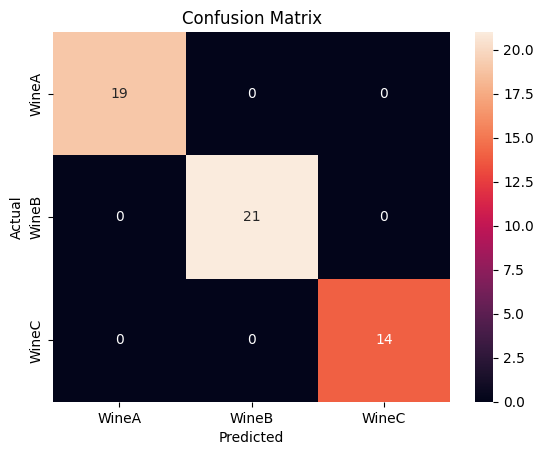

              precision    recall  f1-score   support

       WineA       1.00      1.00      1.00        19
       WineB       1.00      1.00      1.00        21
       WineC       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [21]:
cm = confusion_matrix(y_test, y_pred, labels=["WineA","WineB","WineC"])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["WineA","WineB","WineC"], yticklabels=["WineA","WineB","WineC"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=["WineA","WineB","WineC"]))
